In [81]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.cluster import KMeans
from sklearn.neighbors import KernelDensity
from scipy.optimize import curve_fit
from scipy.special import erf

import transport_signal_processing as tsp
from data_manager import DataManager
import fittes as fts

#### input all parameters here

In [85]:
# parameters
path = "3MGdmClpH75_PNA_10uM_K238A_25C_200mV"

# parameters
key_sel = 'voltage'

#parameters for fitting 

dt = 1e-5
xlims_on = (0.0, 10.0)
xlims_off = (0.0, 500.0)
bins_on = 40
bins_off = 50

lxlims_on = (-1.0, 3.0)
lxlims_off = (0.0, 5.0)
lbins_on = 80
lbins_off = 50

#### just run rest of script

In [86]:
level = 1
selected_only = True

# setup database connector
sigman = DataManager('database')

# load segments informations
sinfo_l = sigman.load_info(path, 's*')

# convert info to dataframe
df = pd.DataFrame(sinfo_l)

# keep only selected segments
df = df[(df['selected'] > (level-1))]
display(df)

# load stats grouped by selected key
stats_dict = tsp.utils.load_stats_for_key(sigman, df.to_dict('records'), key_sel, selected_only=selected_only)

# find keys
key_sels = np.unique(df[key_sel].values)

events_dict = {}
for key in tqdm(key_sels):
    # subset
    dfs = df[df[key_sel] == key].copy()

    # load core events
    events_dict[key] = tsp.utils.load_core_events(sigman, dfs.to_dict('record'), selected_only=selected_only)

ranges_dict = {}
for key in tqdm(key_sels):
    # subset
    dfs = df[df[key_sel] == key].copy()

    # load core events
    ranges_dict[key] = tsp.utils.load_range_events(sigman, dfs.to_dict('record'))

,condition,analyte,concentration,pore,temperature,voltage,date,channel,id,sid,segment_range,segment_duration,MODIFIED,mI_open,sI_open,N_events,N_cores,N_reduced,selected,ratio_sel
2,3MGdmClpH75,PNA,10,K238A,25,200,20230809,003,5-0,2,"[3591972, 3893759]",3.01787,2023-08-21_17:34:15,283.370985,6.330647,5,2.0,2.0,1.0,0.500000
4,3MGdmClpH75,PNA,10,K238A,25,200,20230809,003,5-1,1,"[493036, 1207802]",7.14766,2023-08-21_17:34:15,249.158780,5.698710,9,6.0,6.0,1.0,0.666667
7,3MGdmClpH75,PNA,10,K238A,25,200,20230809,003,5-1,4,"[6183192, 6406113]",2.22921,2023-08-21_17:34:15,274.199987,6.344641,6,3.0,3.0,1.0,0.666667
8,3MGdmClpH75,PNA,10,K238A,25,200,20230809,003,5-1,5,"[6632041, 6757996]",1.25955,2023-08-21_17:34:15,272.448991,8.598796,3,2.0,2.0,1.0,0.500000
9,3MGdmClpH75,PNA,10,K238A,25,200,20230809,003,5-1,6,"[7287825, 7478759]",1.90934,2023-08-21_17:34:15,274.403622,6.652915,3,2.0,2.0,1.0,1.000000
14,3MGdmClpH75,PNA,10,K238A,25,200,20230809,003,5-1,11,"[12652078, 12888998]",2.36920,2023-08-21_17:34:15,247.604129,5.881180,3,2.0,2.0,1.0,0.500000
15,3MGdmClpH75,PNA,10,K238A,25,200,20230809,003,5-1,12,"[13662751, 13873676]",2.10925,2023-08-21_17:34:15,274.604632,7.520626,5,4.0,4.0,1.0,0.750000
16,3MGdmClpH75,PNA,10,K238A,25,200,20230809,003,5-1,13,"[14938338, 15416180]",4.77842,2023-08-21_17:34:15,275.525854,6.266189,90,42.0,42.0,1.0,0.071429
17,3MGdmClpH75,PNA,10,K238A,25,200,20230809,003,5-1,14,"[16631790, 16826724]",1.94934,2023-08-21_17:34:15,247.762454,5.877095,4,2.0,2.0,1.0,1.000000
19,3MGdmClpH75,PNA,10,K238A,25,200,20230809,003,5-1,16,"[19616825, 19939717]",3.22892,2023-08-21_17:34:15,276.145105,6.655378,26,7.0,7.0,1.0,0.285714


  0%|          | 0/1 [00:00<?, ?it/s]/home/lfkrapp/anaconda3/envs/tsp/lib/python3.9/site-packages/pandas/core/frame.py:1549: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  warnings.warn(
100%|██████████| 1/1 [00:00<00:00, 12.09it/s]


/data2/yhsieh/EOF/fittes.py:44: RuntimeWarning: overflow encountered in exp
  return a*np.exp(-b*x)
/data2/yhsieh/EOF/fittes.py:44: RuntimeWarning: overflow encountered in multiply
  return a*np.exp(-b*x)


200


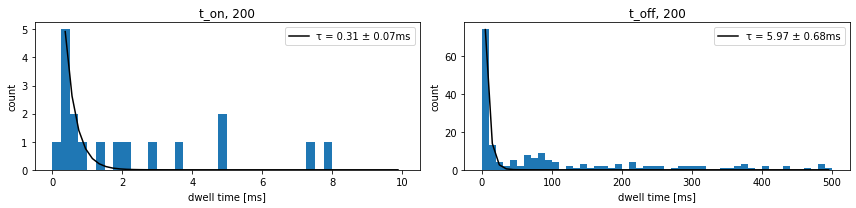

<ipython-input-87-f31d295ec3c4>:47: RuntimeWarning: divide by zero encountered in log10
  plt.plot(x_on, np.log10(h_on), '.-')
<ipython-input-87-f31d295ec3c4>:54: RuntimeWarning: divide by zero encountered in log10
  plt.plot(x_off, np.log10(h_off), '.-')


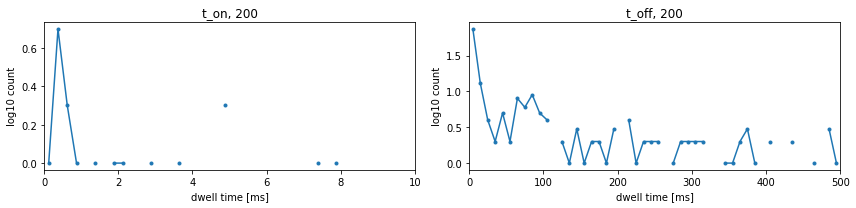

<ipython-input-87-f31d295ec3c4>:65: RuntimeWarning: invalid value encountered in log10
  ldwt_off = np.log10(dwt_off)


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

In [87]:


results = []
for key in ranges_dict:
    print(key)
    rngs = np.array(ranges_dict[key])
    events = events_dict[key]
    
    results.append({'name':key})
    
    #dwt_on = 1e3*dt*(rngs[:,1] - rngs[:,0])
    dwt_on = np.array([evt[-1,0]-evt[0,0] for evt in events if len(evt) > 1])
    dwt_off = 1e3*dt*(rngs[1:,0]-rngs[:-1,1])

    x_on, y_on, a_on, err_on = fts.exp_dist_fit(dwt_on, xlims_on, bins_on)
    x_off, y_off, a_off, err_off = fts.exp_dist_fit(dwt_off, xlims_off, bins_off)
    
    results[-1]['exp_dwt[ms]'] = 1.0/a_on
    results[-1]['exp_freq[Hz]'] = a_off *1000

    plt.figure(figsize=(12,3))
    plt.subplot(121)
    plt.hist(dwt_on, range=xlims_on, bins=bins_on)
    plt.plot(x_on, y_on, 'k-', label='τ = {:.2f} ± {:.2f}ms'.format(1.0/a_on, err_on))
    plt.legend(loc='best')
    plt.xlabel('dwell time [ms]')
    plt.ylabel('count')
    plt.title('t_on, {}'.format(key))

    plt.subplot(122)
    plt.hist(dwt_off, range=xlims_off, bins=bins_off)
    plt.plot(x_off, y_off, 'k-', label='τ = {:.2f} ± {:.2f}ms'.format(1.0/a_off, err_off))
    plt.legend(loc='best')
    plt.xlabel('dwell time [ms]')
    plt.ylabel('count')
    plt.title('t_off, {}'.format(key))
    plt.tight_layout()
   # plt.savefig("graphs/dwt_exp_fit_{}.png".format(key), dpi=200)
    plt.show()

    h_on, x_on = np.histogram(dwt_on, range=xlims_on, bins=bins_on)
    x_on = 0.5*(x_on[:-1] + x_on[1:])

    h_off, x_off = np.histogram(dwt_off, range=xlims_off, bins=bins_off)
    x_off = 0.5*(x_off[:-1] + x_off[1:])

    plt.figure(figsize=(12,3))
    plt.subplot(121)
    plt.plot(x_on, np.log10(h_on), '.-')
    plt.xlim(xlims_on)
    plt.xlabel('dwell time [ms]')
    plt.ylabel('log10 count')
    plt.title('t_on, {}'.format(key))

    plt.subplot(122)
    plt.plot(x_off, np.log10(h_off), '.-')
    plt.xlim(xlims_off)
    plt.xlabel('dwell time [ms]')
    plt.ylabel('log10 count')
    plt.title('t_off, {}'.format(key))
    plt.tight_layout()
   # plt.savefig("graphs/dwt_log_count_{}.png".format(key), dpi=200)
    plt.show()


    ldwt_on = np.log10(dwt_on)
    ldwt_off = np.log10(dwt_off)

    x_on, y_on, a_on, err_on = fts.gauss_dist_fit(ldwt_on, lxlims_on, lbins_on)
    x_off, y_off, a_off, err_off = fts.gauss_dist_fit(ldwt_off, lxlims_off, lbins_off)

    results[-1]['gauss_dwt[ms]'] = a_on
    results[-1]['gauss_freq[Hz]'] = 1000/a_off

    plt.figure(figsize=(12,3))
    plt.subplot(121)
    plt.hist(ldwt_on, range=lxlims_on, bins=lbins_on)
    plt.plot(x_on, y_on, 'k-', label='τ = {:.2f} ± {:.2f}ms'.format(a_on, err_on))
    plt.legend(loc='best')
    plt.xlabel('log10 dwell time [ms]')
    plt.ylabel('count')
    plt.title('t_on, {}'.format(key))

    plt.subplot(122)
    plt.hist(ldwt_off, range=lxlims_off, bins=lbins_off)
    plt.plot(x_off, y_off, 'k-', label='τ = {:.2f} ± {:.2f}ms'.format(a_off, err_off))
    plt.legend(loc='best')
    plt.xlabel('log10 dwell time [log10 ms]')
    plt.ylabel('count')
    plt.title('t_off, {}'.format(key))
    plt.tight_layout()
    #plt.savefig("graphs/dwt_gauss_fit_{}.png".format(key), dpi=200)
    plt.show()

In [ ]:
r = pd.DataFrame(results)
r

KeyError: 'gauss_freq[Hz]'

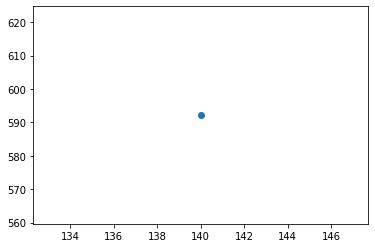

In [80]:
fsz = 16
sk = r['name'].values.astype(int)
#sk = r['name'].values
plt.figure()
plt.plot(sk, r['exp_freq[Hz]'].values, label = 'Exponential fit', marker = 'o')
plt.plot(sk, r['gauss_freq[Hz]'].values, label = 'Gauss fit', marker = 'o')
plt.ylabel('Eventfrequency [Hz]', fontsize = fsz)
plt.xlabel('{}'.format(key_sel), fontsize = fsz)
plt.legend(loc = 'best', fontsize = 0.8*fsz)
plt.title('''{}
'''.format(path), fontsize = 0.8*fsz)
plt.show()


plt.figure()
plt.plot(sk, r['exp_dwt[ms]'].values, label = 'Exponential fit', marker = 'o')
plt.plot(sk, r['gauss_dwt[ms]'].values, label = 'Gauss fit', marker = 'o')
plt.ylabel('Dwell time [ms]', fontsize = fsz)
plt.xlabel('{}'.format(key_sel), fontsize = fsz)
plt.legend(loc = 'best', fontsize = 0.8*fsz)
plt.title('''{}
'''.format(path), fontsize = 0.8*fsz)
plt.show()